<a href="https://colab.research.google.com/github/Vasyl808/deepfake_video_detection/blob/main/fakeavceleb_balanced_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install facenet_pytorch --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.9 MB/s eta 0:00:00


In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1abOH_th3RXci7yUrN4TWCKWTjVUTVMKv/view?usp=sharing -O FakeAVCeleb.zip

Downloading...
From (original): https://drive.google.com/uc?id=1abOH_th3RXci7yUrN4TWCKWTjVUTVMKv
From (redirected): https://drive.google.com/uc?id=1abOH_th3RXci7yUrN4TWCKWTjVUTVMKv&confirm=t&uuid=52aabcc0-fa13-44cb-99b6-d1f7cc078466
To: /content/FakeAVCeleb.zip
100% 6.40G/6.40G [00:55<00:00, 116MB/s] 


In [4]:
!gdown --fuzzy https://drive.google.com/file/d/13GaVwQw_3fFYwoWc86oyhtlPEQjTQT69/view?usp=sharing -O archive_uadfv.zip

Downloading...
From (original): https://drive.google.com/uc?id=13GaVwQw_3fFYwoWc86oyhtlPEQjTQT69
From (redirected): https://drive.google.com/uc?id=13GaVwQw_3fFYwoWc86oyhtlPEQjTQT69&confirm=t&uuid=28c12a76-a90f-493a-b7e8-b2a458a6f60a
To: /content/archive_uadfv.zip
100% 153M/153M [00:02<00:00, 70.4MB/s]


In [5]:
!unzip /content/FakeAVCeleb.zip

Streaming output truncated to the last 5000 lines.
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01075_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01216_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01231_XXpYdOHUF-g.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01238_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id02466_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03556_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03605_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03707_pwNcRPQ5qdo.mp4  
  inflating: FakeAVCeleb_v1.2/F

In [6]:
!unzip /content/archive_uadfv.zip

Archive:  /content/archive_uadfv.zip
  inflating: fake_videos/test/fake/0046_fake.mp4  
  inflating: fake_videos/test/fake/0047_fake.mp4  
  inflating: fake_videos/test/fake/0048_fake.mp4  
  inflating: fake_videos/test/real/0046.mp4  
  inflating: fake_videos/test/real/0047.mp4  
  inflating: fake_videos/test/real/0048.mp4  
  inflating: fake_videos/train/fake/0000_fake.mp4  
  inflating: fake_videos/train/fake/0001_fake.mp4  
  inflating: fake_videos/train/fake/0002_fake.mp4  
  inflating: fake_videos/train/fake/0003_fake.mp4  
  inflating: fake_videos/train/fake/0004_fake.mp4  
  inflating: fake_videos/train/fake/0005_fake.mp4  
  inflating: fake_videos/train/fake/0006_fake.mp4  
  inflating: fake_videos/train/fake/0007_fake.mp4  
  inflating: fake_videos/train/fake/0008_fake.mp4  
  inflating: fake_videos/train/fake/0009_fake.mp4  
  inflating: fake_videos/train/fake/0010_fake.mp4  
  inflating: fake_videos/train/fake/0011_fake.mp4  
  inflating: fake_videos/train/fake/0012_fake.mp

In [7]:
import pandas as pd
from sklearn.utils import resample
df = pd.read_csv('/content/FakeAVCeleb/meta_data.csv')


df_unique = df.groupby(['category', 'race', 'gender']).apply(lambda x: x.drop_duplicates(subset=['source', 'path']).head(50))

# Якщо необхідно, скидаємо індекси після групування
df_unique = df_unique.reset_index(drop=True)

# Записуємо результат у новий CSV
df_unique.to_csv("balanced_dataset.csv", index=False)


<ipython-input-7-101beec56c45>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_unique = df.groupby(['category', 'race', 'gender']).apply(lambda x: x.drop_duplicates(subset=['source', 'path']).head(50))


In [8]:
print("\nРозподіл за race та gender для кожного класу:")
for category in df_unique['category'].unique():
    print(f"\nCategory {category}:")
    print(df_unique[df_unique['category'] == category][['race', 'gender']].value_counts())



Розподіл за race та gender для кожного класу:

Category A:
race                  gender
African               men       50
                      women     50
Asian (East)          men       50
                      women     50
Asian (South)         men       50
                      women     50
Caucasian (American)  men       50
                      women     50
Caucasian (European)  men       50
                      women     50
Name: count, dtype: int64

Category B:
race                  gender
African               men       50
                      women     50
Asian (East)          men       50
                      women     50
Asian (South)         men       50
                      women     50
Caucasian (American)  men       50
                      women     50
Caucasian (European)  men       50
                      women     50
Name: count, dtype: int64

Category C:
race                  gender
African               men       50
                      women     50
Asian

In [9]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('balanced_dataset.csv')


result = {}
for _, row in df.iterrows():
    # Формування ключа з шляху
    s = '/'
    file_path = '/content/' + str(row['Unnamed: 9']) + s + row['path']

    label = row['category']


    result[file_path] = {
        'label': label
    }


with open('output_balenced.json', 'w') as json_file:
    json.dump(result, json_file)

In [10]:
import json
from collections import Counter

# Зчитування JSON файлу
with open('output_balenced.json', 'r') as json_file:
    data = json.load(json_file)

# Ініціалізація лічильника для підрахунку лейблів
label_counts = Counter()

# Підрахунок кожного лейбла
for item in data.values():
    label_counts[item['label']] += 1

# Вивід розподілу лейблів
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")


Label: A, Count: 500
Label: B, Count: 500
Label: C, Count: 500
Label: D, Count: 500


In [11]:
import cv2
import itertools
import json
import numpy as np
import pandas as pd
import random
from torch.nn import functional as F
import os.path
import time
import torch
from torch import nn
from torch.nn import functional
import glob
import datetime
import subprocess
from facenet_pytorch import MTCNN
import shutil
import matplotlib.pyplot as plt
from pathlib import Path


class FaceDeepfakeDataset(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        self.n_frames = n_frames
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device=device, post_process=False)

        # Load video paths
        for i in range(len(folders)):
            if train:
                with open('/content/output_balenced.json') as f:
                    videos = json.load(f)
                    videos = [(video, metadata) for (video, metadata) in videos.items()]
                    self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

        if self.cache_folder:
            os.makedirs(self.cache_folder, exist_ok=True)

    def __process_frame(self, frame, prev_frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)  # Отримуємо координати обличчя

        if boxes is None:
            face = prev_frame
            face = cv2.resize(face, (224, 224))
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0
            return face
        else:
            # Беремо перше обличчя (якщо знайдено кілька)
            box = boxes[0]

            # Розширюємо рамку на 30%
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            # Обрізаємо зображення за новими координатами
            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))  # Масштабуємо до 300x300

            # Перетворюємо на тензор і нормалізуємо
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

        return face

    def __pad_or_trim_frames(self, frames):
        if len(frames) == self.n_frames:
            return frames
        elif len(frames) < self.n_frames:
            # Дублюємо останній кадр поки не досягнемо необхідної кількості
            frames += [frames[-1]] * (self.n_frames - len(frames))
        elif len(frames) > self.n_frames:
            # Залишаємо тільки перші n_frames кадрів
            frames = frames[:self.n_frames]
        return frames

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Check if cached frames exist
        cache_file = None
        if self.cache_folder:
            video_name = os.path.basename(video).replace('.mp4', '_frames.pt')
            cache_file = os.path.join(self.cache_folder, video_name)
            if os.path.exists(cache_file):
                frames = torch.load(cache_file).to(self.device)
                if self.train:
                    label = 0.0
                    if metadata['label'] == 'C' or metadata['label'] == 'D':
                        label = 1.0
                    return frames, torch.FloatTensor([label]).to(self.device)
                else:
                    return frames

        # Processing video frames
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)
        prev_frame = torch.zeros((3, 224, 224))
        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(self.__process_frame(frame, prev_frame))
            prev_frame = frame
        cap.release()

        # Pad or trim frames to ensure consistent length
        frames = self.__pad_or_trim_frames(frames)
        frames = torch.stack(frames).to(self.device)

        # Cache processed frames
        if cache_file:
            torch.save(frames, cache_file)

        # Return data
        if self.train:
            label = 0.0
            if metadata['label'] == 'C' or metadata['label'] == 'D':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

Label: tensor([0.], device='cuda:0')


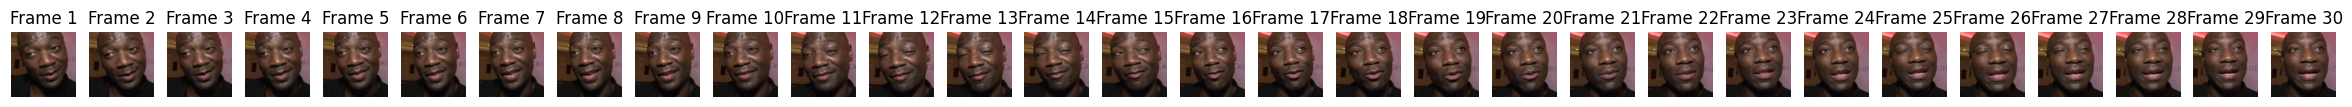

In [12]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/FakeAVCeleb/']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDataset(TRAIN_FOLDERS, n_frames=30, train=True, device=device)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 30, figsize=(30, 10))

        for j in range(30):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [13]:
class FaceDeepfakeDatasetTest(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        """n_audio_reads controls the length of the audio sequence: 5000 readings/sec."""
        self.n_frames = n_frames
        self.n_audio_reads = n_audio_reads
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device=device, post_process=False)
        for i in range(len(folders)):
            if train:
                #print(folders[i])
                for item in os.listdir(folders[i]):
                    item_path = os.path.join(folders[i], item)
                    if str(os.path.basename(item_path)) == 'fake':
                        for curr in os.listdir(item_path):
                            if os.path.isfile(os.path.join(item_path, curr)):
                                metadata = {}
                                metadata['label']='fake'
                                self.videos += [(os.path.join(item_path, curr), metadata)]
                    else:
                        for item_file in os.listdir(item_path):
                            if os.path.isfile(os.path.join(item_path, item_file)):
                                metadata = {}
                                metadata['label']='real'
                                self.videos += [(os.path.join(item_path, item_file), metadata)]
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

    def __process_frame(self, frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)  # Отримуємо координати обличчя

        if boxes is None:
            # Повертаємо порожній кадр, якщо обличчя не знайдено
            face = torch.zeros((3, 224, 224))
        else:
            # Беремо перше обличчя (якщо знайдено кілька)
            box = boxes[0]

            # Розширюємо рамку на 30%
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            # Обрізаємо зображення за новими координатами
            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))  # Масштабуємо до 300x300

            # Перетворюємо на тензор і нормалізуємо
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

        return face

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Processing video frames
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)

        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(self.__process_frame(frame))
        '''total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        step = max(1, total_frames // self.n_frames)

        for i in range(self.n_frames):
            cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
            ret, frame = cap.read()
            if ret:
                frames.append(self.__process_frame(frame))
            else:
                break'''
        cap.release()
        frames = torch.stack(frames).to(self.device)

        # Return data
        if self.train:
            label = 0.0
            if metadata['label'] == 'fake':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

Label: tensor([0.], device='cuda:0')


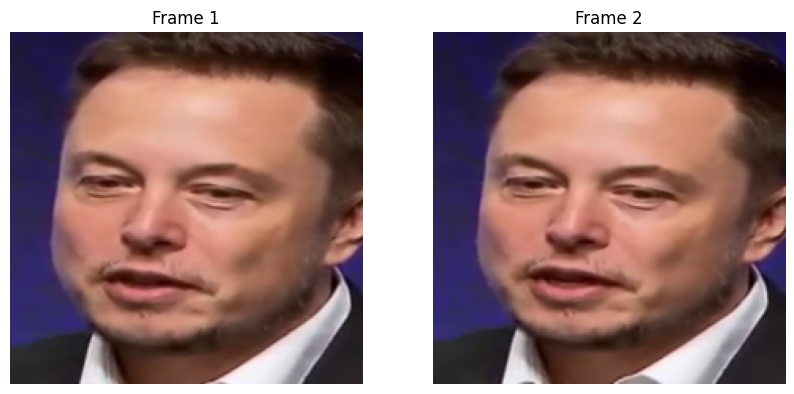

In [14]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/fake_videos/train']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDatasetTest(TRAIN_FOLDERS, n_frames=30, train=True, device=device, cache_folder=None)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        for j in range(2):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [15]:
import torch
import torch.nn as nn
import math
from torch.nn import functional as F
import torchvision.models as models


class FaceClassifier(nn.Module):
    def __init__(self, n_linear_hidden=256, lstm_hidden_dim=128, num_lstm_layers=1, dropout=0.3):
        super(FaceClassifier, self).__init__()

        # Завантаження попередньо натренованої EfficientNet
        self.cnn = models.efficientnet_b7(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.cnn.children())[:-1])  # Виключаємо шар класифікації

        for param in self.feature_extractor.parameters():
            param.requires_grad = False

        # Розмір виходу від feature extractor
        self.feature_output_size = 2560  # EfficientNet B7 дає 2560 ознак

        # LSTM для обробки послідовності ознак кожного кадру
        self.lstm = nn.LSTM(input_size=self.feature_output_size,
                            hidden_size=lstm_hidden_dim,
                            num_layers=num_lstm_layers,
                            dropout=dropout,
                            batch_first=True,
                            bidirectional=True)

        # Повнозв'язні шари для класифікації
        self.fc1 = nn.Linear(2 * lstm_hidden_dim, n_linear_hidden)  # множимо на 2 через bidirectional LSTM
        self.fc2 = nn.Linear(n_linear_hidden, 1)

    def forward(self, vid_frames):
        # Витягання ознак для кожного кадру
        batch_size, num_frames, channels, height, width = vid_frames.shape
        vid_frames = vid_frames.view(batch_size * num_frames, channels, height, width)

        # Використовуємо фічерний екстрактор
        with torch.no_grad():
            vid_features = self.feature_extractor(vid_frames)

        # Переформатовуємо ознаки для LSTM
        vid_features = vid_features.view(batch_size, num_frames, -1)  # (batch_size, num_frames, feature_output_size)

        # Обробка послідовності кадрів через LSTM
        lstm_out, _ = self.lstm(vid_features)  # lstm_out: (batch_size, num_frames, 2 * lstm_hidden_dim)

        # Використання середнього значення по кадрам для об'єднання послідовності (можна також використовувати останній кадр або інші методи агрегації)
        lstm_out = torch.mean(lstm_out, dim=1)  # (batch_size, 2 * lstm_hidden_dim)

        # Класифікаційні шари
        x = torch.relu(self.fc1(lstm_out))
        x = self.fc2(x)

        return x

all train folders: ['/content/FakeAVCeleb'], <class 'list'>
all test folders: ['/content/fake_videos/train'], <class 'list'>


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B7_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B7_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-c5b4e57e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-c5b4e57e.pth
100%|██████████| 255M/255M [00:05<00:00, 46.2MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer,

start time: 2024-11-08 14:55:14.717290
using device: cuda
250


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

[[895 105]
 [129 871]]


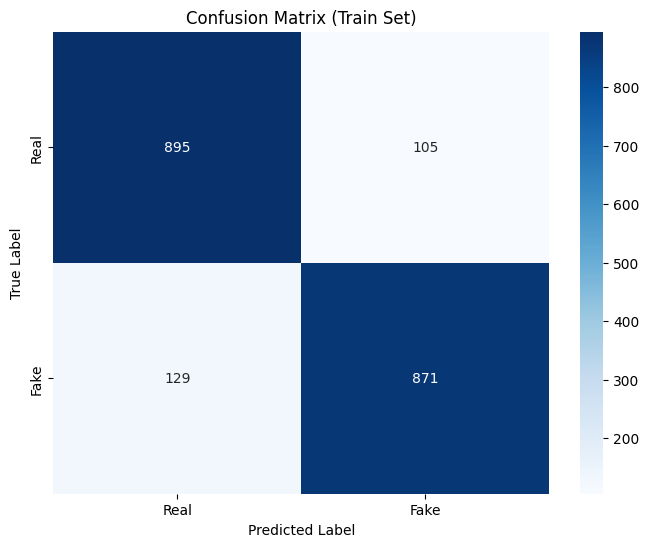

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.87      0.90      0.88      1000
        Fake       0.89      0.87      0.88      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

...........
epoch: 0, train loss: 0.3034493452757597, val loss: 6.896576028994539, executed in: 1916.6714363098145
train total: 2000, train correct: 1766.0, train incorrect: 234.0, train accuracy: 0.8830000162124634
valid total: 82, valid correct: 50.0, valid incorrect: 32.0, valid accuracy: 0.6097560524940491


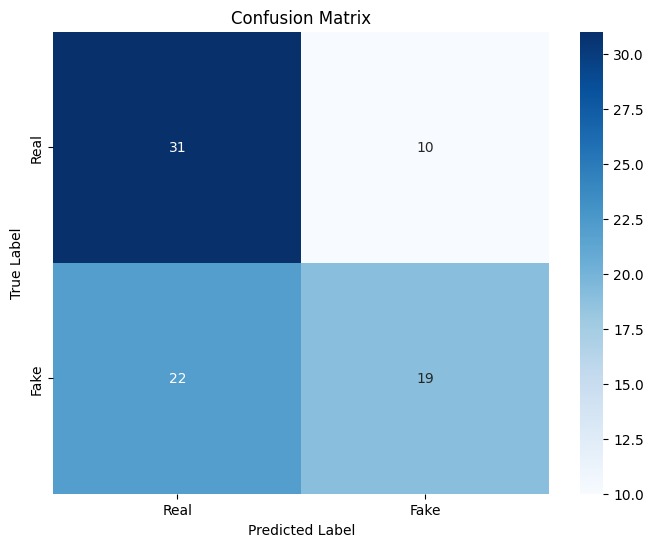

Classification Report:
              precision    recall  f1-score   support

        Real       0.58      0.76      0.66        41
        Fake       0.66      0.46      0.54        41

    accuracy                           0.61        82
   macro avg       0.62      0.61      0.60        82
weighted avg       0.62      0.61      0.60        82



0it [00:00, ?it/s]<ipython-input-11-67a66a782d2d>:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
250it [14:09,  3.40s/it]


[[954  46]
 [ 72 928]]


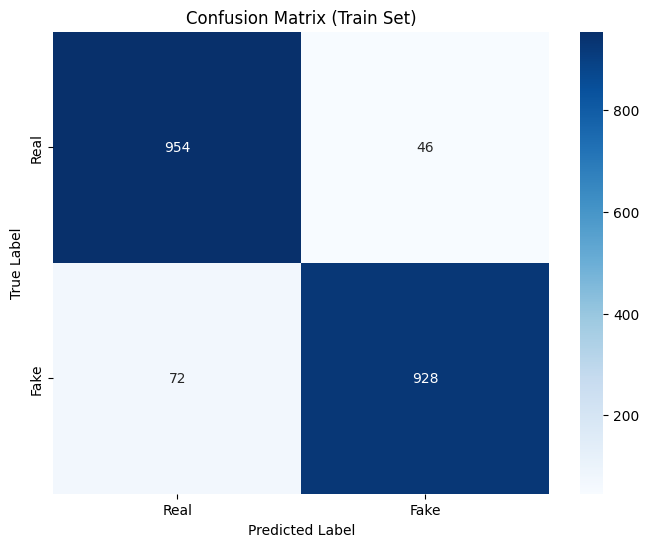

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.95      0.94      1000
        Fake       0.95      0.93      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

...........
epoch: 1, train loss: 0.16898128244420513, val loss: 3.8404836919137533, executed in: 962.5011904239655
train total: 2000, train correct: 1882.0, train incorrect: 118.0, train accuracy: 0.9410000443458557
valid total: 82, valid correct: 42.0, valid incorrect: 40.0, valid accuracy: 0.5121951103210449


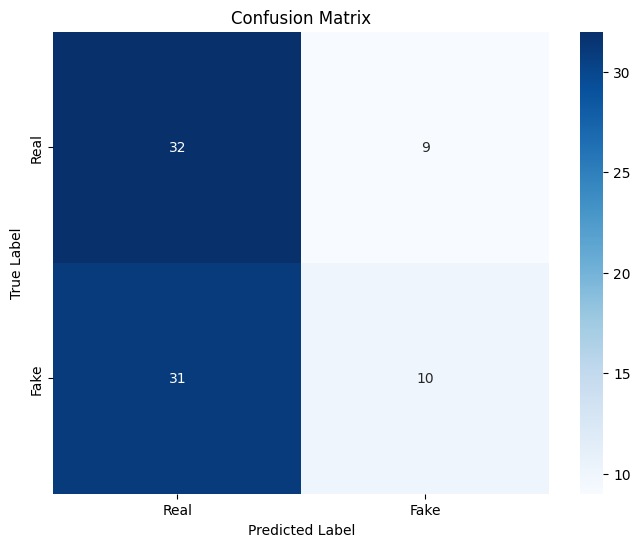

Classification Report:
              precision    recall  f1-score   support

        Real       0.51      0.78      0.62        41
        Fake       0.53      0.24      0.33        41

    accuracy                           0.51        82
   macro avg       0.52      0.51      0.47        82
weighted avg       0.52      0.51      0.47        82



0it [00:00, ?it/s]<ipython-input-11-67a66a782d2d>:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
250it [14:20,  3.44s/it]


[[960  40]
 [ 75 925]]


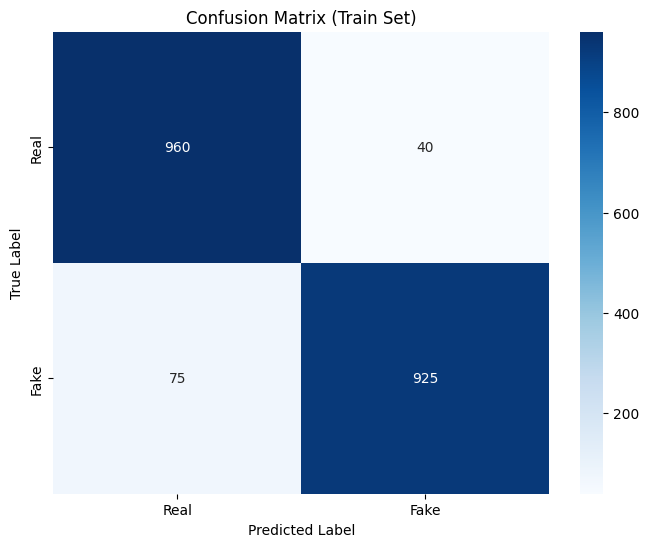

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.96      0.94      1000
        Fake       0.96      0.93      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

...........
epoch: 2, train loss: 0.16997955453651958, val loss: 3.8631716940118084, executed in: 973.1269760131836
train total: 2000, train correct: 1885.0, train incorrect: 115.0, train accuracy: 0.9425000548362732
valid total: 82, valid correct: 45.0, valid incorrect: 37.0, valid accuracy: 0.5487804412841797


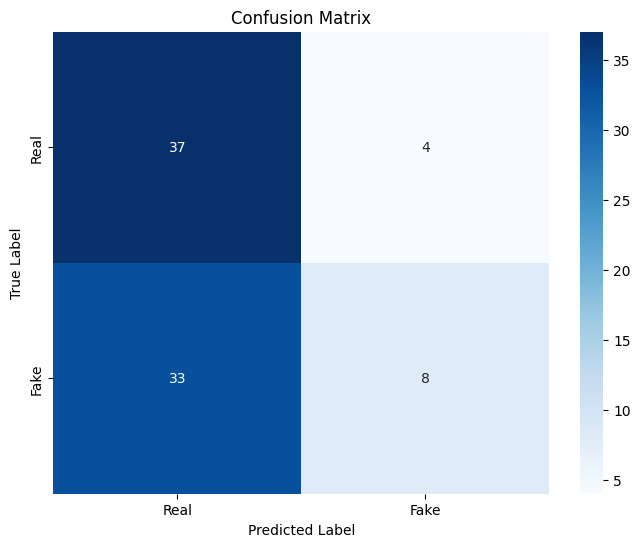

Classification Report:
              precision    recall  f1-score   support

        Real       0.53      0.90      0.67        41
        Fake       0.67      0.20      0.30        41

    accuracy                           0.55        82
   macro avg       0.60      0.55      0.48        82
weighted avg       0.60      0.55      0.48        82



0it [00:00, ?it/s]<ipython-input-11-67a66a782d2d>:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
250it [14:31,  3.48s/it]


[[955  45]
 [ 44 956]]


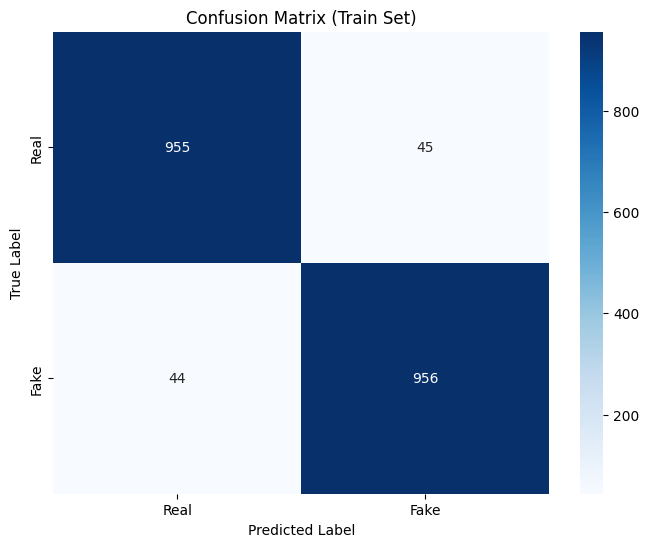

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.96      0.95      0.96      1000
        Fake       0.96      0.96      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

...........
epoch: 3, train loss: 0.13228891469177323, val loss: 3.0065662429948463, executed in: 984.40789270401
train total: 2000, train correct: 1911.0, train incorrect: 89.0, train accuracy: 0.955500066280365
valid total: 82, valid correct: 43.0, valid incorrect: 39.0, valid accuracy: 0.5243902206420898


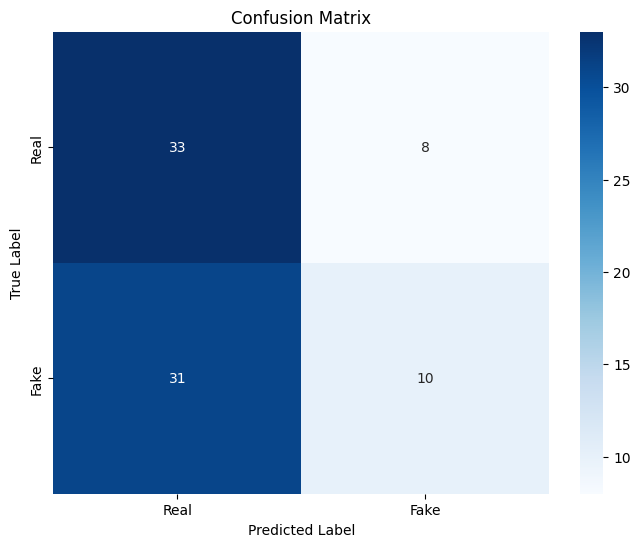

Classification Report:
              precision    recall  f1-score   support

        Real       0.52      0.80      0.63        41
        Fake       0.56      0.24      0.34        41

    accuracy                           0.52        82
   macro avg       0.54      0.52      0.48        82
weighted avg       0.54      0.52      0.48        82



0it [00:00, ?it/s]<ipython-input-11-67a66a782d2d>:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
250it [14:31,  3.49s/it]


[[967  33]
 [ 45 955]]


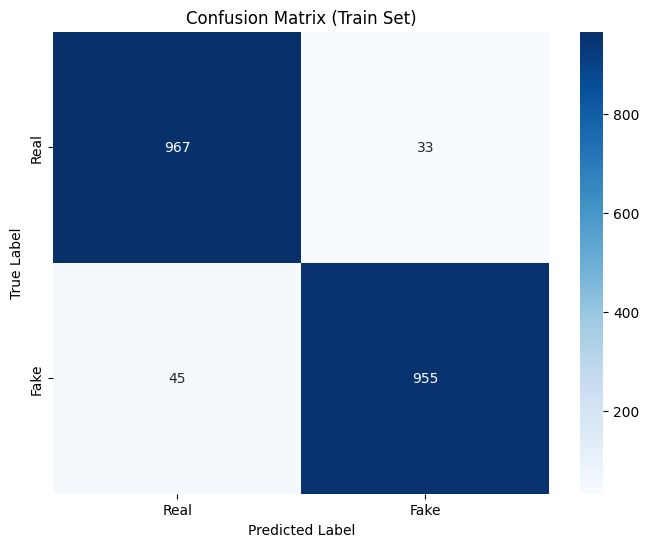

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.96      0.97      0.96      1000
        Fake       0.97      0.95      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

...........
epoch: 4, train loss: 0.10689971596968825, val loss: 2.429538999311097, executed in: 985.4872949123383
train total: 2000, train correct: 1922.0, train incorrect: 78.0, train accuracy: 0.9610000252723694
valid total: 82, valid correct: 41.0, valid incorrect: 41.0, valid accuracy: 0.4999999701976776


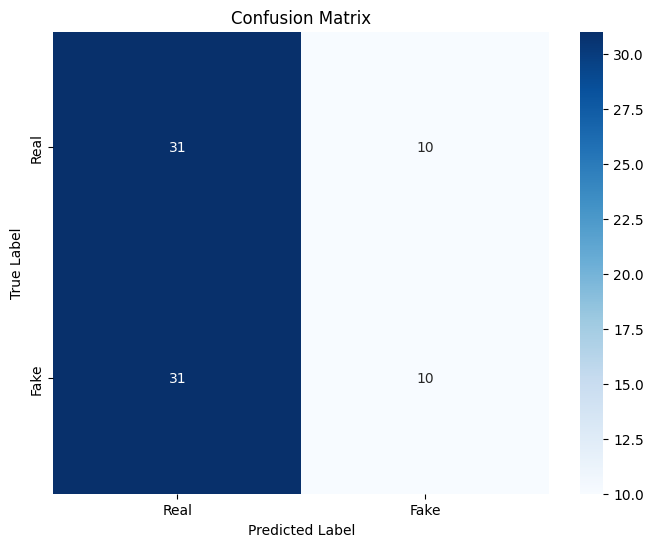

Classification Report:
              precision    recall  f1-score   support

        Real       0.50      0.76      0.60        41
        Fake       0.50      0.24      0.33        41

    accuracy                           0.50        82
   macro avg       0.50      0.50      0.46        82
weighted avg       0.50      0.50      0.46        82



0it [00:00, ?it/s]<ipython-input-11-67a66a782d2d>:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
250it [14:38,  3.51s/it]


[[972  28]
 [ 37 963]]


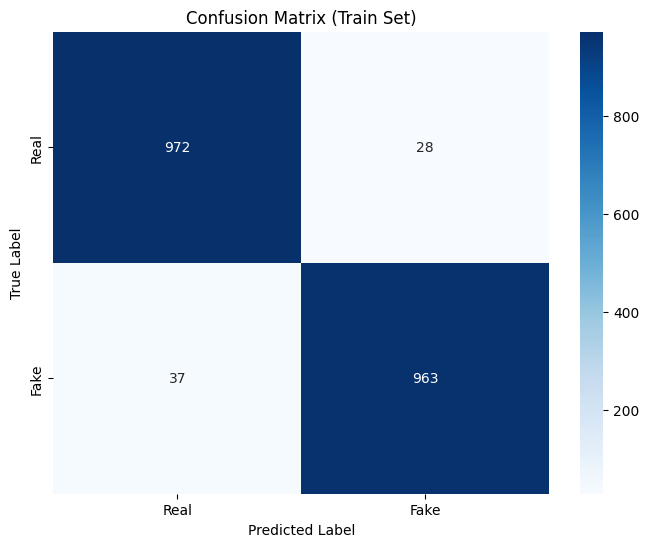

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.96      0.97      0.97      1000
        Fake       0.97      0.96      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

...........
epoch: 5, train loss: 0.11119163835549262, val loss: 2.5270826898975596, executed in: 992.4569067955017
train total: 2000, train correct: 1935.0, train incorrect: 65.0, train accuracy: 0.9675000309944153
valid total: 82, valid correct: 42.0, valid incorrect: 40.0, valid accuracy: 0.5121951103210449


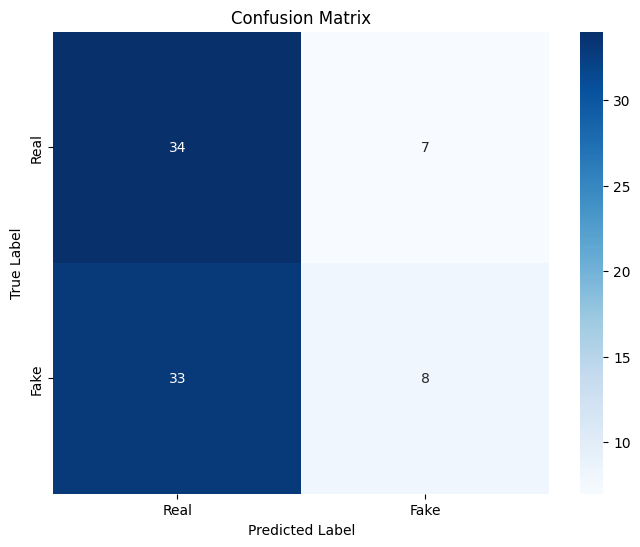

Classification Report:
              precision    recall  f1-score   support

        Real       0.51      0.83      0.63        41
        Fake       0.53      0.20      0.29        41

    accuracy                           0.51        82
   macro avg       0.52      0.51      0.46        82
weighted avg       0.52      0.51      0.46        82



0it [00:00, ?it/s]<ipython-input-11-67a66a782d2d>:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
250it [14:41,  3.53s/it]


[[987  13]
 [ 30 970]]


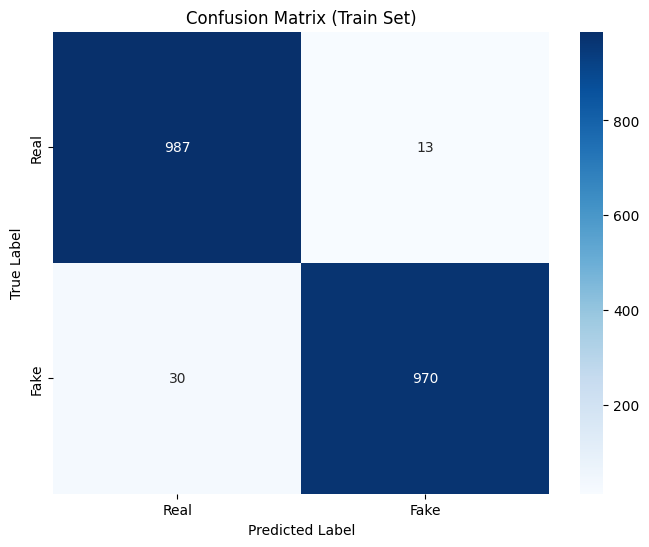

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.97      0.99      0.98      1000
        Fake       0.99      0.97      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

...........
epoch: 6, train loss: 0.06928232521167957, val loss: 1.5745983002654447, executed in: 993.9718968868256
train total: 2000, train correct: 1957.0, train incorrect: 43.0, train accuracy: 0.9785000681877136
valid total: 82, valid correct: 44.0, valid incorrect: 38.0, valid accuracy: 0.5365853309631348


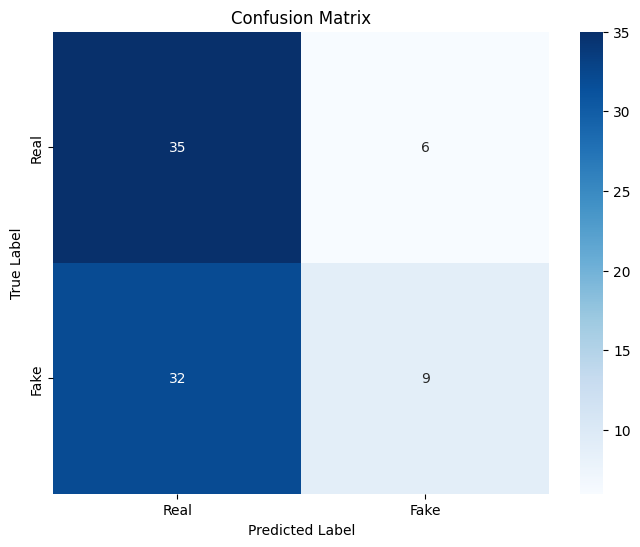

Classification Report:
              precision    recall  f1-score   support

        Real       0.52      0.85      0.65        41
        Fake       0.60      0.22      0.32        41

    accuracy                           0.54        82
   macro avg       0.56      0.54      0.48        82
weighted avg       0.56      0.54      0.48        82

end time: 2024-11-08 17:05:54.062921
executed in: 2:10:39.345631
Tesla T4
Memory Usage:
Allocated: 0.4 GB
Cached:    1.0 GB


<ipython-input-16-e5a28cf7118a>:248: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


In [16]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


base_path = 'deepfake-detection-challenge'

#train_folder = os.listdir(str(sys.argv[1]))
train_folders = ['/content/FakeAVCeleb']


#test_folder = os.listdir(str(sys.argv[2]))
test_folders = ['/content/fake_videos/train']

batch_size = int(8)
num_epochs = int(7)
n_frames = int(30)
lr = float(0.01)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")
# AUTOENCODER = 'autoencoder_H10M46S22_04-11-21.pt'

# batch_size = 10
# num_epochs = 1
# epoch_size = 500
# n_frames = 30
milestones = [6,12,18]
gamma = 0.1
n_vid_features = 36*36 # 3600
n_aud_features = 1
n_head = 8
n_layers = 6

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#autoencoder = FaceAutoencoder()
#if len(sys.argv) > 7:
#    print("pretrained autoencoder is loaded")
#    AUTOENCODER = str(sys.argv[7])
#    autoencoder.load_state_dict(torch.load(AUTOENCODER, map_location=device))
#autoencoder.to(device)
#autoencoder.eval()

model = FaceClassifier()
#model.load_state_dict(torch.load('/content/drive/MyDrive/b7_faces_224_b0_lstm_celebav_1_classifier_30_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device)
# dataset_size = len(dataset)
# val_split = .3
# val_size = int(val_split * dataset_size)
# train_size = dataset_size - val_size
# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    torch.cuda.empty_cache()
    gc.collect()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/b7_faces_224_b0_lstm_celebav_{epoch + 1}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/b7_faces_224_b0_lstm_celebav_{epoch + 1}_classifier_{n_frames}_small.pt')

torch.save(model.state_dict(), f'classifier_{n_frames}_ex.pt')
end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

#df = pd.DataFrame()
#df['train_loss'] = train_losses.cpu().numpy()
#df['val_loss'] = val_losses.cpu().numpy()
#df['train_acc'] = train_accuracies.cpu().numpy()
#df['val_acc'] = val_accuracies.cpu().numpy()
#df['epoch_times'] = epoch_times

#df.to_csv(f'train_classifier_nframes{n_frames}_bs{batch_size}_lr{lr}.csv', index=False)